In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit # to get even classes in the test split
from sklearn.model_selection import train_test_split
from LinearRegression import LinearRegression


In [15]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
# Splitting data into test set with even classes
lr_data = iris.data

# model_1_X = np.vstack((lr_data[:,0], lr_data[:,2])).transpose()
model_1_X = lr_data[:,0] # sepal length 
model_1_y = lr_data[:,1] # target= sepal width

# # Use StratifiedShuffleSplit to select 10% of the data with an even split
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
# 
# for train_index, test_index in sss.split(model_1_X, model_1_y):
#     X_subset, y_subset = model_1_X[test_index], model_1_y[test_index]
# Now, X_subset and y_subset contain the randomly selected 10% of the Iris dataset with an even split of each class

In [17]:
# display(X_subset,y_subset)

In [18]:
model_1_X_train , model_1_X_test, model_1_y_train, model_1_y_test = train_test_split(model_1_X, model_1_y, test_size=0.1, random_state=42)


In [19]:
reg = LinearRegression()
reg.fit(model_1_X_train, model_1_y_train,regularization=2)
b = reg.bias
m = reg.weights[0]

[0.4848956]


In [20]:
model_1_y_pred = reg.predict(model_1_X_test)
model_1_y_pred

array([3.04579134, 2.8518331 , 3.82162429, 2.99730178, 3.38521826,
       2.70636442, 2.80334354, 3.43370782, 3.0942809 , 2.90032266,
       3.23974958, 2.41542707, 2.75485398, 2.46391663, 2.56089574])

In [21]:
reg.score(model_1_X_test, model_1_y_test)

0.47226523583205526

In [24]:
# saving model parameters using pickle
with open('reg_model_ass1.pkl', 'wb') as f:
    pickle.dump(reg,f)

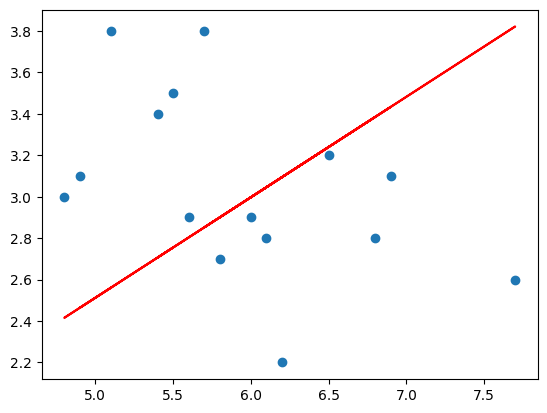

In [23]:
# y_hat = reg.predict(data)

# Visualize the new solution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(model_1_X_test, model_1_y_test)
# ax.scatter(model_1_X_test, y)
ax.plot(model_1_X_test, model_1_y_pred, c='r')